In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(r"C:\Users\sabni\Documents\BML\ObesityDataSet_raw_and_data_sinthetic.csv")
print(df.head(20))
print("\n\n\n\n")

# Drop missing values
df.dropna(axis=0, inplace=True)

# Display info and basic stats
print("DataFrame Info:")
print(df.info())
print("\n\n\n\n")

print("Descriptive Statistics:")
print(df.describe())
print("\n\n\n\n")

# Check for null values
print("Any Null Values Present:")
print(df.isnull().any())
print("\n\n\n\n")

print("Sum of Null Values per Column:")
print(df.isnull().sum())
print("\n\n\n\n")

# Check for duplicates
print("Any Duplicated Rows:")
print(df.duplicated().any())
print("\n\n\n\n")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned DataFrame
output_path = r"C:\Users\sabni\Documents\SKILL\hi2.csv"
df.to_csv(output_path, index=False)



    Gender  Age  Height  Weight1 family_history_with_overweight FAVC  FCVC  \
0   Female   21    1.62     64.0                            yes   no   2.0   
1   Female   21    1.52     56.0                            yes   no   3.0   
2     Male   23    1.80     77.0                            yes   no   2.0   
3     Male   27    1.80     87.0                             no   no   3.0   
4     Male   22    1.78     89.8                             no   no   2.0   
5     Male   29    1.62     53.0                             no  yes   2.0   
6   Female   23    1.50     55.0                            yes  yes   3.0   
7     Male   22    1.64     53.0                             no   no   2.0   
8     Male   24    1.78     64.0                            yes  yes   3.0   
9     Male   22    1.72     68.0                            yes  yes   2.0   
10    Male   26    1.85    105.0                            yes  yes   3.0   
11  Female   21    1.72     80.0                            yes 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Define features and target
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target variable

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=500, multi_class='ovr', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Gaussian Naïve Bayes (for continuous data)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
report_gnb = classification_report(y_test, y_pred_gnb)
print(f"Gaussian Naïve Bayes Accuracy: {accuracy_gnb:.4f}")
print("Gaussian Naïve Bayes Classification Report:\n", report_gnb)

# Multinomial Naïve Bayes (for count-based or discrete features)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
report_mnb = classification_report(y_test, y_pred_mnb)
print(f"\nMultinomial Naïve Bayes Accuracy: {accuracy_mnb:.4f}")
print("Multinomial Naïve Bayes Classification Report:\n", report_mnb)

# Bernoulli Naïve Bayes (for binary/boolean features)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
report_bnb = classification_report(y_test, y_pred_bnb)
print(f"\nBernoulli Naïve Bayes Accuracy: {accuracy_bnb:.4f}")
print("Bernoulli Naïve Bayes Classification Report:\n", report_bnb)


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Ensure X_train and X_test are numeric
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Encode categorical labels (if necessary)
if isinstance(y_train[0], str):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

class CustomGaussianNB:
    def fit(self, X, y):
        """Fit the Gaussian Naïve Bayes model."""
        self.classes = np.unique(y)
        self.class_priors = {c: np.mean(y == c) for c in self.classes}  # P(y)
        self.means = {c: np.mean(X[y == c], axis=0) for c in self.classes}  # μ
        self.variances = {c: np.var(X[y == c], axis=0) + 1e-6 for c in self.classes}  # σ² (add small value to avoid division by zero)

    def gaussian_pdf(self, x, mean, var):
        """Compute the probability density function of a Gaussian distribution."""
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

    def predict(self, X):
        """Predict class labels for given data."""
        predictions = []
        for x in X:
            class_probs = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])  # log(P(y))
                likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.variances[c])))  # log(P(X|y))
                class_probs[c] = prior + likelihood  # log(P(y|X))
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

# Train Custom Gaussian Naïve Bayes
nb_custom = CustomGaussianNB()
nb_custom.fit(X_train.to_numpy(), y_train)  # Convert to NumPy array

# Predictions
y_pred_custom = nb_custom.predict(X_test.to_numpy())  # Convert to NumPy array

# Evaluation
accuracy_custom = accuracy_score(y_test, y_pred_custom)
report_custom = classification_report(y_test, y_pred_custom)

print(f"Custom Gaussian Naïve Bayes Accuracy: {accuracy_custom:.4f}")
print("Custom Gaussian Naïve Bayes Classification Report:\n", report_custom)


Custom Gaussian Naïve Bayes Accuracy: 0.6028
Custom Gaussian Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.76        54
           1       0.67      0.41      0.51        58
           2       0.35      0.56      0.43        70
           3       0.54      0.93      0.69        60
           4       1.00      0.98      0.99        65
           5       0.63      0.29      0.40        58
           6       0.67      0.17      0.27        58

    accuracy                           0.60       423
   macro avg       0.65      0.60      0.58       423
weighted avg       0.65      0.60      0.58       423



C:\Users\sabni\AppData\Local\Temp\ipykernel_7840\3539216989.py:36: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self.gaussian_pdf(x, self.means[c], self.variances[c])))  # log(P(X|y))


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

class CustomMultinomialNB:
    def __init__(self, alpha=1):
        self.alpha = alpha  # Laplace smoothing parameter

    def fit(self, X, y):
        y = np.array(y)  # Convert to NumPy array for proper indexing
        self.classes = np.unique(y)
        
        # Compute class priors: P(y)
        self.class_priors = {c: np.mean(y == c) for c in self.classes}
        
        # Compute feature counts (Laplace smoothed)
        self.feature_counts = {c: np.sum(X[y == c], axis=0) + self.alpha for c in self.classes}
        
        # Compute feature probabilities: P(X|y)
        self.feature_probs = {c: self.feature_counts[c] / self.feature_counts[c].sum(axis=0, keepdims=True) for c in self.classes}

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])  # log(P(y))
                
                # Avoid log(0) issues by replacing 0 with a small value
                feature_prob = np.clip(self.feature_probs[c], 1e-10, None)
                
                likelihood = np.sum(np.log(feature_prob) * x)  # log(P(X|y))
                class_probs[c] = prior + likelihood  # log(P(y|X))
            
            predictions.append(max(class_probs, key=class_probs.get))
        
        return np.array(predictions)

# Train Custom Multinomial Naïve Bayes
nb_multinomial = CustomMultinomialNB(alpha=1)
nb_multinomial.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert to NumPy

# Predictions
y_pred_multinomial = nb_multinomial.predict(X_test.to_numpy())  # Convert to NumPy

# Evaluation
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
report_multinomial = classification_report(y_test, y_pred_multinomial)

print(f"\nCustom Multinomial Naïve Bayes Accuracy: {accuracy_multinomial:.4f}")
print("Custom Multinomial Naïve Bayes Classification Report:\n", report_multinomial)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Ensure numeric X and encode categorical y
X_train, X_test = X_train.apply(pd.to_numeric, errors='coerce'), X_test.apply(pd.to_numeric, errors='coerce')
if isinstance(y_train[0], str):
    le = LabelEncoder()
    y_train, y_test = le.fit_transform(y_train), le.transform(y_test)

class CustomDecisionTree:
    def __init__(self, max_depth=5, criterion="gini"):
        self.max_depth, self.criterion, self.tree = max_depth, criterion, None

    def _entropy(self, y):
        probs = np.bincount(y) / len(y)
        return -np.sum(probs * np.log2(probs + 1e-9))  # Avoid log(0)

    def _gini(self, y):
        probs = np.bincount(y) / len(y)
        return 1 - np.sum(probs**2)

    def _best_split(self, X, y):
        best_feature, best_threshold, best_score = None, None, float('inf')
        score_fn = self._gini if self.criterion == "gini" else self._entropy

        for feature in range(X.shape[1]):
            for threshold in np.unique(X[:, feature]):
                left, right = y[X[:, feature] <= threshold], y[X[:, feature] > threshold]
                if len(left) == 0 or len(right) == 0: continue
                weighted_score = (len(left) * score_fn(left) + len(right) * score_fn(right)) / len(y)
                if weighted_score < best_score:
                    best_feature, best_threshold, best_score = feature, threshold, weighted_score

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            return np.bincount(y).argmax()
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None: return np.bincount(y).argmax()

        mask = X[:, best_feature] <= best_threshold
        return {"feature": best_feature, "threshold": best_threshold, 
                "left": self._build_tree(X[mask], y[mask], depth+1),
                "right": self._build_tree(X[~mask], y[~mask], depth+1)}

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _predict_one(self, x, tree):
        return self._predict_one(x, tree["left"]) if isinstance(tree, dict) and x[tree["feature"]] <= tree["threshold"] else (self._predict_one(x, tree["right"]) if isinstance(tree, dict) else tree)

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])

# Train and Evaluate
tree_model = CustomDecisionTree(max_depth=5, criterion="gini")
tree_model.fit(X_train.to_numpy(), y_train)
y_pred_tree = tree_model.predict(X_test.to_numpy())

print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree model
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)  
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_tree:.4f}")
print("Decision Tree Classification Report:\n", report_tree)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN Model
k = 5  # Choose an appropriate value of k
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("KNN Classification Report:\n", report_knn)


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Ensure X_train and X_test are numeric
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Encode categorical labels (if necessary)
if isinstance(y_train[0], str):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

class CustomKNN:
    def __init__(self, k=5):
        self.k = k  # Number of neighbors

    def euclidean_distance(self, x1, x2):
        """Calculate Euclidean distance manually"""
        return np.sqrt(np.sum((x1 - x2) ** 2))  # Vectorized for better performance

    def fit(self, X, y):
        """Store training data"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict_one(self, x):
        """Predict a single sample"""
        # Compute distances from the test sample to all training samples
        distances = np.array([self.euclidean_distance(x, x_train) for x_train in self.X_train])
        
        # Get indices of k nearest neighbors
        k_neighbors_idx = np.argsort(distances)[:self.k]
        
        # Get the labels of k nearest neighbors
        k_neighbors_labels = self.y_train[k_neighbors_idx]
        
        # Return the most common label
        return Counter(k_neighbors_labels).most_common(1)[0][0]

    def predict(self, X):
        """Predict multiple samples"""
        return np.array([self.predict_one(x) for x in X])

# Train Custom KNN Model
k = 5  # Choose k value
knn_custom = CustomKNN(k=k)
knn_custom.fit(X_train.to_numpy(), y_train)  # Convert to NumPy array

# Predictions
y_pred_custom_knn = knn_custom.predict(X_test.to_numpy())  # Convert to NumPy array

# Evaluation
accuracy_custom_knn = accuracy_score(y_test, y_pred_custom_knn)
report_custom_knn = classification_report(y_test, y_pred_custom_knn)

print(f"Custom KNN Accuracy: {accuracy_custom_knn:.4f}")
print("Custom KNN Classification Report:\n", report_custom_knn)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Scale training data

# Train K-Means Model
k = 3  # Number of clusters
kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
kmeans_model.fit(X_scaled)

# Cluster Assignments
clusters = kmeans_model.predict(X_test)

# Centroid Locations
centroids = kmeans_model.cluster_centers_

print(f"Cluster Assignments:\n{clusters}")
print(f"Centroids:\n{centroids}")


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class CustomKMeans:
    def __init__(self, k=3, max_iters=100, tol=1e-4):
        self.k = k  # Number of clusters
        self.max_iters = max_iters  # Maximum number of iterations
        self.tol = tol  # Tolerance for convergence

    def euclidean_distance(self, x1, x2):
        """Calculate Euclidean distance manually (Vectorized)"""
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def initialize_centroids(self, X):
        """Randomly initialize k centroids"""
        np.random.seed(42)  # For reproducibility
        indices = np.random.choice(len(X), self.k, replace=False)
        return X[indices]

    def assign_clusters(self, X, centroids):
        """Assign each data point to the nearest centroid"""
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in centroids] for x in X])
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, clusters):
        """Update centroids by computing the mean of assigned points"""
        new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else self.centroids[i] for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        """Train the K-Means model"""
        X = np.array(X)  # Ensure it's a NumPy array
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iters):
            clusters = self.assign_clusters(X, self.centroids)
            new_centroids = self.update_centroids(X, clusters)

            # Check for convergence
            if np.max(np.abs(new_centroids - self.centroids)) < self.tol:
                break

            self.centroids = new_centroids
        
        self.clusters = clusters  # Store final clusters

    def predict(self, X):
        """Assign new data points to the nearest cluster"""
        return self.assign_clusters(X, self.centroids)


# Load and Normalize Data (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.to_numpy())  # Convert to NumPy array and normalize

# Train Custom K-Means Model
k = 3  # Number of clusters
kmeans_custom = CustomKMeans(k=k)
kmeans_custom.fit(X_scaled)

# Predictions
clusters = kmeans_custom.predict(X_test.to_numpy())  # Convert to NumPy array

print(f"Cluster Assignments:\n{clusters}")


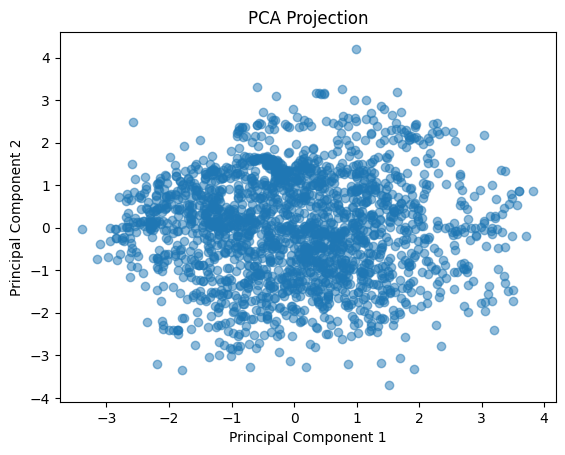

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def pca_manual(data, n_components):
    # Step 1: Standardize the dataset
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(standardized_data, rowvar=False)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvalues and select respective eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select top n_components
    transformation_matrix = eigenvectors[:, :n_components]
    transformed_data = np.dot(standardized_data, transformation_matrix)
    
    return transformed_data, transformation_matrix, eigenvalues, eigenvectors

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_cols]

# Apply PCA
transformed_data, transformation_matrix, eigenvalues, eigenvectors = pca_manual(numerical_data, n_components=2)

# Visualize PCA result
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()


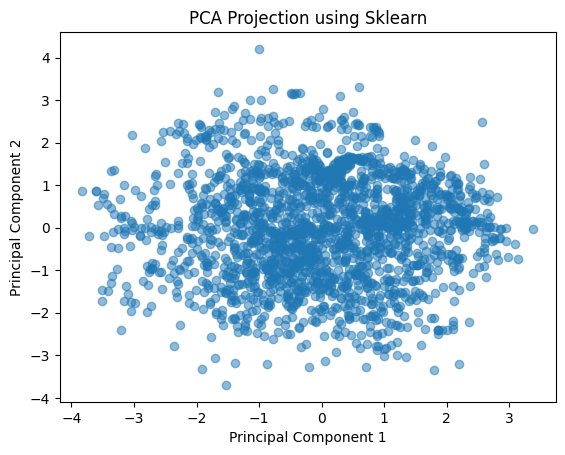

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_cols]

# Step 1: Standardize the dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Step 2-4: Apply PCA using sklearn
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(standardized_data)

# Visualize PCA result
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection using Sklearn')
plt.show()


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# Step 2: Separate features and target
X = df.drop("NObeyesdad", axis=1)  # Replace 'target' with your actual label column
y = df["NObeyesdad"]

# Step 3: Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# Step 5: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9621749408983451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.89      0.95      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Separate features and target
X = df.drop("NObeyesdad", axis=1)  # Replace 'target' with your actual label column
y = df["NObeyesdad"]

# Step 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the dataset into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---------------------------------------
# 🧪 BAGGING: Random Forest Classifier
# ---------------------------------------
print("=== BAGGING: Random Forest Classifier ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on validation set
val_preds_rf = rf_model.predict(X_val)
print("Validation Accuracy (Random Forest):", accuracy_score(y_val, val_preds_rf))

# Final test set evaluation
test_preds_rf = rf_model.predict(X_test)
print("Test Accuracy (Random Forest):", accuracy_score(y_test, test_preds_rf))
print("Classification Report:\n", classification_report(y_test, test_preds_rf))

# ---------------------------------------
# 🚀 BOOSTING: AdaBoost Classifier
# ---------------------------------------
print("\n=== BOOSTING: AdaBoost Classifier ===")
boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boost_model.fit(X_train, y_train)

# Evaluate on validation set
val_preds_boost = boost_model.predict(X_val)
print("Validation Accuracy (AdaBoost):", accuracy_score(y_val, val_preds_boost))

# Final test set evaluation
test_preds_boost = boost_model.predict(X_test)
print("Test Accuracy (AdaBoost):", accuracy_score(y_test, test_preds_boost))
print("Classification Report:\n", classification_report(y_test, test_preds_boost))


=== BAGGING: Random Forest Classifier ===
Validation Accuracy (Random Forest): 0.9407582938388626
Test Accuracy (Random Forest): 0.9408983451536643
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.84      0.89      0.87        55
           2       0.99      0.96      0.97        76
           3       0.98      1.00      0.99        55
           4       1.00      0.99      0.99        70
           5       0.88      0.88      0.88        58
           6       0.92      0.90      0.91        52

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423


=== BOOSTING: AdaBoost Classifier ===
Validation Accuracy (AdaBoost): 0.43838862559241704
Test Accuracy (AdaBoost): 0.458628841607565
Classification Report:
               precision    recall  f1-score   support

           0     

c:\Users\sabni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sabni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sabni\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import mode
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


# Load your dataset into df (make sure to define or import df before this step)
# df = pd.read_csv("your_dataset.csv")  # <-- Uncomment and use your dataset path

# Step 2: Separate features and target
X = df.drop("NObeyesdad", axis=1)  # Replace 'NObeyesdad' with your actual target column if different
y = df["NObeyesdad"]

# Step 3: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Shuffle and split into 3 equal parts
X_scaled, y = shuffle(X_scaled, y, random_state=42)
split1 = int(len(X) / 3)
split2 = 2 * split1

X1, y1 = X_scaled[:split1], y[:split1]
X2, y2 = X_scaled[split1:split2], y[split1:split2]
X3, y3 = X_scaled[split2:], y[split2:]

# Hold out a test set from full data
X_test, y_test = X_scaled[:100], y[:100]  # You can change this as needed

# ---------------------------------------
# 🎯 Custom Bagging Ensemble (Random Forest)
# ---------------------------------------
print("=== CUSTOM BAGGING ENSEMBLE ===")

# Train models on each part
rf1 = RandomForestClassifier(n_estimators=100, random_state=1).fit(X1, y1)
rf2 = RandomForestClassifier(n_estimators=100, random_state=2).fit(X2, y2)
rf3 = RandomForestClassifier(n_estimators=100, random_state=3).fit(X3, y3)

# Get predictions from each model
pred1 = rf1.predict(X_test)
pred2 = rf2.predict(X_test)
pred3 = rf3.predict(X_test)

# Perform majority voting
preds_bagging = np.array([pred1, pred2, pred3])
final_preds_bagging = mode(preds_bagging, axis=0, keepdims=False).mode

# Evaluate
print("Bagging Accuracy:", accuracy_score(y_test, final_preds_bagging))
print("Classification Report:\n", classification_report(y_test, final_preds_bagging))

# ---------------------------------------
# 🚀 Custom Boosting Ensemble (AdaBoost)
# ---------------------------------------
print("\n=== CUSTOM BOOSTING ENSEMBLE ===")

# Train models on each part
boost1 = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss').fit(X1, y1)
boost2 = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss').fit(X1, y1)
boost3 = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss').fit(X1, y1)


# Get predictions from each model
b_pred1 = boost1.predict(X_test)
b_pred2 = boost2.predict(X_test)
b_pred3 = boost3.predict(X_test)

# Majority voting
boost_preds = np.array([b_pred1, b_pred2, b_pred3])
final_preds_boosting = mode(boost_preds, axis=0, keepdims=False).mode

# Evaluate
print("Boosting Accuracy:", accuracy_score(y_test, final_preds_boosting))
print("Classification Report:\n", classification_report(y_test, final_preds_boosting))


ModuleNotFoundError: No module named 'xgboost'